In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Inspect the number of tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Measurement = Base.classes.measurement
Station = Base.classes.station
# reflect the tables

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

#  Exploratory Precipitation Analysis

In [10]:
engine.execute('SELECT measurement.date, measurement.prcp FROM measurement WHERE measurement.date BETWEEN "2016/08/23" AND "2017/08/23"').fetchall()

[('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-10', 0.0),
 ('2017-01-11', 0.0),
 ('2017-01-12', 0.0),
 ('2017-01-13', 0.0),
 ('2017-01-14', 0.0),
 ('2017-01-15', 0.0),
 ('2017-01-16', 0.0),
 ('2017-01-17', 0.0),
 ('2017-01-18', 0.0),
 ('2017-01-19', 0.0),
 ('2017-01-20', 0.0),
 ('2017-01-21', 0.0),
 ('2017-01-22', 0.16),
 ('2017-01-23', 0.0),
 ('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 ('2017-02-14', 0.0),
 (

In [11]:
session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016/08/23', '2017/08/17'))

In [12]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()

most_recent

('2017-08-23')

In [14]:
last_12 =(dt.datetime.strptime(most_recent[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()
last_12

datetime.date(2016, 8, 23)

In [ ]:
# for percip in recent_12_months_of_percipitation:
#     (Measurement.date, Measurement.prcp) = percip
#     print(f" The dates are {Measurement.date} and the prcp is {Measurement.prcp}."
#         )

In [15]:
# Design a query to calculate the PTP for stock `IBM` after May, 2011

results = session.query(Measurement.date, 
                        Measurement.prcp).\
                  filter(Measurement.date > last_12).all()
results
# # List comprehension solution
# ptp_rows = [{"date": result[1], "prcp": result[0]} for result in results]
# ptp_rows

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

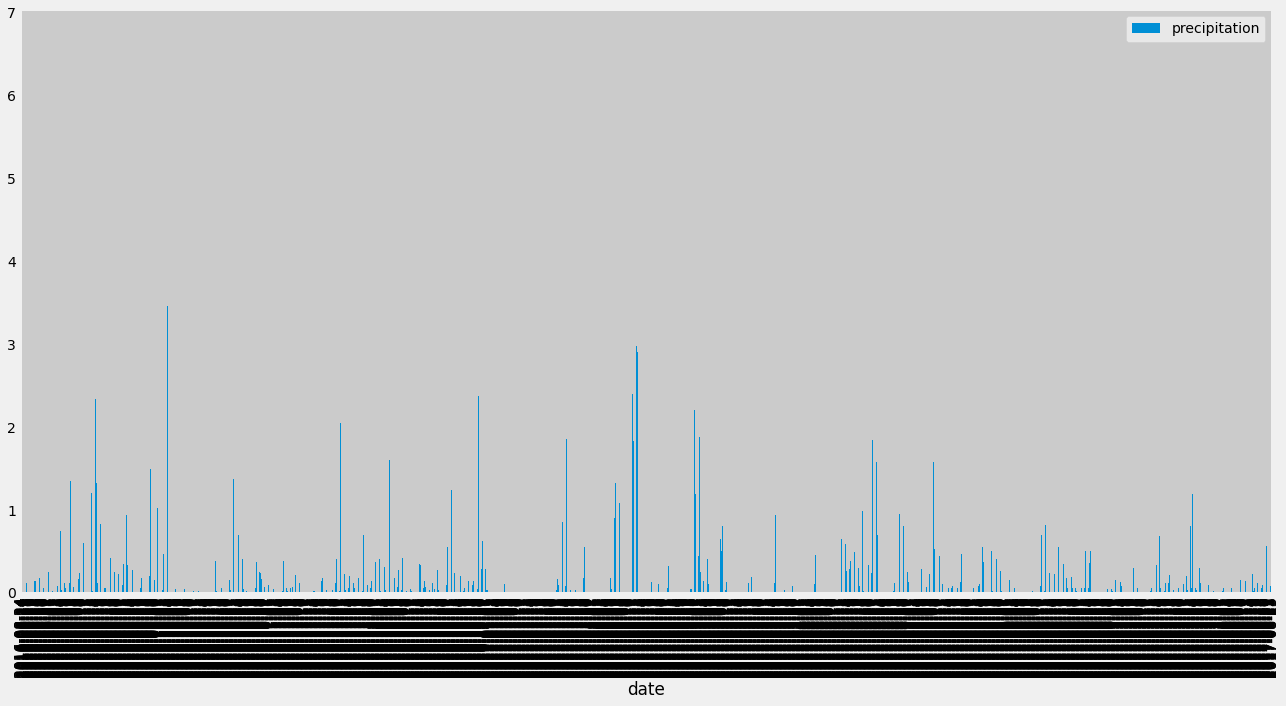

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).\
order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
results = session.query(Measurement.date, 
                        Measurement.prcp).\
                  filter(Measurement.date > last_12).all()

# # Save the query results as a Pandas DataFrame and set the index to the date column. Sort the dataframe by date
df = pd.DataFrame(results, columns=['date', 'precipitation']).fillna(0).sort_values(by='date', ascending=True)
df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(rot=90, figsize=(20,10))
# plt.tight_layout()
plt.savefig("12_Months_Precipitation_Data.png")
plt.show()

In [23]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
df.describe(include='all')  

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


#  Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [ ]:
 # Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order. ***In other words, count the number of
# times a station was recorded in measurements, list the 9 stations and the count of each station it was listed.***
stations = [Station.station, 
       func.count(Station.station)]
active_stations = session.query(*stations).all()
active_stations

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Close session

In [29]:
# Close Session
session.close()